In [5]:
get_ipython().system("pip install 'rfpimp==1.3.7' as rfpimp")
get_ipython().system('pip install pandas')
get_ipython().system('pip install sklearn.ensemble')
get_ipython().system('pip install sklearn.model_selection')
get_ipython().system("pip install 'scikit-learn==0.22.2'")


from rfpimp import importances, plot_importances
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split

df_orig = pd.read_csv("/Users/vanessawilson/sbox/Curriculum/DA_DA430/rent.csv")


  Using cached rfpimp-1.3.7.tar.gz (10 kB)
  Preparing metadata (setup.py) ... - done
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
ERROR: Could not find a version that satisfies the requirement sklearn.ensemble (from versions: none)
ERROR: No matching distribution found for sklearn.ensemble
ERROR: Could not find a version that satisfies the requirement sklearn.model_selection (from versions: none)
ERROR: No matching distribution found for sklearn.model_selection


In [6]:
import numpy as np
df = df_orig.copy()

# attentuate affect of outliers in price
df['price'] = np.log(df['price'])


In [7]:
df.head()

,bathrooms,bedrooms,price,longitude,latitude,interest_level
0,1.5,3,8.006368,-73.9425,40.7145,2
1,1.0,2,8.606119,-73.9667,40.7947,1
2,1.0,1,7.955074,-74.0018,40.7388,3
3,1.0,1,8.094073,-73.9677,40.7539,1
4,1.0,4,8.116716,-73.9493,40.8241,1


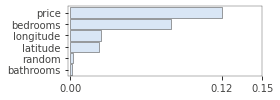

In [8]:
df_train, df_test = train_test_split(df_orig, test_size=0.20)
features = ['bathrooms','bedrooms','price','longitude','latitude',
            'interest_level']
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('interest_level',axis=1), df_train['interest_level']
X_test, y_test = df_test.drop('interest_level',axis=1), df_test['interest_level']
# Add column of random numbers
X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))

rf = RandomForestClassifier(n_estimators=100,min_samples_leaf=5,n_jobs=-1,oob_score=True)
rf.fit(X_train, y_train)

imp = importances(rf, X_test, y_test, n_samples=-1)
viz = plot_importances(imp)
viz.view()